In [74]:
! pip install -U langgraph langchain-openai langchain langsmith


[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [75]:
from langgraph.prebuilt import create_react_agent
from langchain.chat_models import init_chat_model
from langgraph.checkpoint.memory import InMemorySaver

def get_weather(city:str) -> str:
    """Get weather for a given city"""
    return f"Its always rainy in {city}"


checkpointer = InMemorySaver()

model=init_chat_model(
    "gpt-4.1-mini",
    temperature=0
)

config = {"configurable": {"thread_id":"1"}}

agent=create_react_agent(
    model=model,
    tools=[get_weather],
    checkpointer=checkpointer,
    prompt="You are an helpful assistant"
)

agent.invoke({
    "messages":[{"role": "user","content":"what is weather in Hyderabad"}]
},
  config
  )

{'messages': [HumanMessage(content='what is weather in Hyderabad', additional_kwargs={}, response_metadata={}, id='8673d4b7-afe0-49f0-a20d-3e581407dc71'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_HgpfToZidNltA0h6U2iKIQgh', 'function': {'arguments': '{"city":"Hyderabad"}', 'name': 'get_weather'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 55, 'total_tokens': 70, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_6f2eabb9a5', 'id': 'chatcmpl-BebyL3Xq2pJuOdZ0tnei2fcXmuHKq', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--90790ca9-491d-469f-8d71-aa41f10555f3-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'Hyderabad'}, 'id'

In [76]:
agent.invoke({
    "messages":[{"role": "user","content":"what about Rajamundry"}]
},
  config
  )

{'messages': [HumanMessage(content='what is weather in Hyderabad', additional_kwargs={}, response_metadata={}, id='8673d4b7-afe0-49f0-a20d-3e581407dc71'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_HgpfToZidNltA0h6U2iKIQgh', 'function': {'arguments': '{"city":"Hyderabad"}', 'name': 'get_weather'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 55, 'total_tokens': 70, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_6f2eabb9a5', 'id': 'chatcmpl-BebyL3Xq2pJuOdZ0tnei2fcXmuHKq', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--90790ca9-491d-469f-8d71-aa41f10555f3-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'Hyderabad'}, 'id'

In [77]:
from pydantic import BaseModel

class WeatherResp(BaseModel):
    conditions: str
    
agent= create_react_agent(
    model,
    tools=[get_weather],
    response_format=WeatherResp
)


resp=agent.invoke({
    "messages":[{"role": "user","content":"what about Rajamundry"}]
},)

In [78]:
resp["structured_response"].conditions

'Its always rainy in Rajamundry'

In [79]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph,START,END
from langgraph.graph import add_messages

class State(TypedDict):
    messages: Annotated[list,add_messages]
    
graph_builder=StateGraph(State)

llm=init_chat_model("openai:gpt-4.1")

def chatbot(state: State):
    return {"messages":[llm.invoke(state["messages"])]}

graph_builder.add_node("chatbot",chatbot)

graph_builder.add_edge(START,"chatbot")

graph=graph_builder.compile()


In [ ]:
! pip install -U ipython

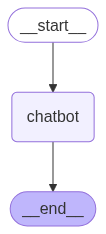

In [ ]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
res=graph.invoke({"messages": ["Hi Hello how are you"]})

In [ ]:
res["messages"][-1].content

"Hello! I'm just a virtual assistant, so I don't have feelings, but I'm here to help you. 😊 How can I assist you today?"

In [ ]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

In [ ]:
stream_graph_updates("What is the Future of AI")

Assistant: The future of **Artificial Intelligence (AI)** holds tremendous promise—and also significant challenges. Here’s an overview based on current trends as of 2024:

---

### 1. **Continuous Innovation & Integration**
- **Ubiquitous AI:** AI is expected to become more deeply embedded in everyday life: smart assistants, autonomous vehicles, personalized medicine, education, and finance.
- **Smarter Devices:** AI integration in edge devices (phones, cars, wearables) for real-time analysis and personalization.

---

### 2. **Generative AI Evolution**
- **More Creative AI:** Generative models (like GPT, DALL-E) will produce more convincing text, art, code, and music; these tools will reshape creative industries and business automation.
- **Mature Multi-Modal AI:** Systems that understand and generate information across text, image, audio, and even video seamlessly.

---

### 3. **Human-AI Collaboration**
- **AI as a Copilot:** Rather than replacing humans, AI will augment human abili

In [ ]:
stream_graph_updates("What question did I have asked you ?")

Assistant: You just asked: **"What question did I have asked you?"**

If you're inquiring about your previous question, this is your first message in this conversation. If you had a specific question in mind before, please ask it and I'll do my best to help!


In [ ]:
! pip install -U langchain-tavily


[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
! pip install dotenv


[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from dotenv import load_dotenv

load_dotenv()

True

In [ ]:
import os
os.getenv("TAVILY_API_KEY")

'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'

In [ ]:
from langchain_tavily import TavilySearch

tool=TavilySearch(max_results=2,
                  api_key="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")
tools=[tool]

tool.invoke("Who is the current president of the USA")

{'query': 'Who is the current president of the USA',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': 'List of presidents of the United States - Wikipedia',
   'url': 'https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States',
   'content': 'The current president of the United States is Donald Trump, who assumed office on January 20, 2025. This web page provides a comprehensive list of all 47 presidents from George Washington to Donald Trump, with their portraits, terms, parties, and vice presidents.',
   'score': 0.9177831,
   'raw_content': None},
  {'title': 'President of the United States - Wikipedia',
   'url': 'https://en.wikipedia.org/wiki/President_of_the_United_States',
   'content': 'The president of the United States (POTUS) [B] is the head of state and head of government of the United States. ... Donald Trump is the 47th and current president since January 20, 2025. [21] History and development. Origins.',
   'score': 0.83614

In [ ]:

{tool.name: tool for tool in tools}

{'tavily_search': TavilySearch(max_results=2, api_wrapper=TavilySearchAPIWrapper(tavily_api_key=SecretStr('**********')))}

In [ ]:
llm_with_tools=llm.bind_tools(tools)

In [ ]:
def chatbot(state: State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

In [ ]:
import json
from langchain_core.messages import ToolMessage

class BasicToolNode:
    """A node that runs the tools which is requested in last AI Message"""
    
    def __init__(self,tools:list):
        self.tools_by_name={tool.name: tool for tool in tools}
    
    def __call__(self, inputs:dict):
        if messages:= inputs.get("messages",[]):
            message=messages[-1]
        else:
            raise ValueError("No message found in input")

        outputs=[]
        for tool_call in message.tool_calls:
            tool_result=self.tools_by_name[tool_call["name"]].invoke(
                tool_call["args"]
            )
            
            outputs.append(
                ToolMessage(
                    content=json.dumps(tool_result),
                    name=tool_call["name"],
                    tool_call_id=tool_call["id"],
                )     
            )
        return {"messages": outputs}

In [ ]:
from langgraph.graph import END
def route_tools(state:State):
    """
    Used in the conditional edge to route to the ToolNode if the last message has the tool call. Otherwise route to the end 
    """
    
    if isinstance(state,list):
        ai_message=state[-1]
    elif messages:=state.get("messages",[]):
        ai_message=messages[-1]
    else:
        raise ValueError('No Message found in input to tool edge')
    
    if hasattr(ai_message,"tool_calls") and len(ai_message.tool_calls) >0 :
        return "tools"
    
    return END

In [ ]:
graph_builder=StateGraph(State)

graph_builder.add_node("chatbot",chatbot)

tool_node=BasicToolNode(tools=[tool])
graph_builder.add_node("tools",tool_node)

In [ ]:
graph_builder.add_conditional_edges(
    "chatbot",
    route_tools,
    {"tools": "tools", END: END},
)

In [ ]:
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")
graph = graph_builder.compile()

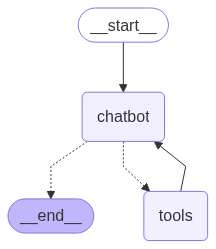

In [ ]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
def custom_graph_update(user_input : str):
    res= graph.invoke({"messages": [{"role":"user","content":user_input}]})
    print("Assistant:", res["messages"][-1].content)

In [ ]:
custom_graph_update("Who is current USA president")

Assistant: The current president of the United States is Donald J. Trump. He was sworn into office on January 20, 2025.


In [ ]:
## With Prebuilt Tools

In [ ]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from typing_extensions import Annotated
from langchain_tavily import TavilySearch
from langgraph.prebuilt import ToolNode,tools_condition
from langgraph.checkpoint.memory import MemorySaver

In [ ]:
class State(TypedDict):
    messages: Annotated[list,add_messages]

graph_builder=StateGraph(State)
llm = init_chat_model("openai:gpt-4.1")
tools = [TavilySearch(max_results=2)]
llm_with_tools.bind_tools(tools)
# memory=MemorySaver()

def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot",chatbot)

tool_node = ToolNode(tools)
graph_builder.add_node("tools",tool_node)

graph_builder.add_conditional_edges("chatbot",tools_condition)

graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("tools","chatbot")


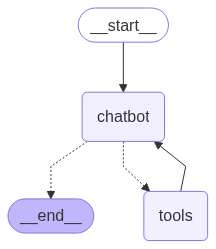

In [ ]:
from IPython.display import Image, display

graph = graph_builder.compile()

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
graph.invoke({"messages": [{"role":"user","content":"Hi My name is Manideep"}]})

KeyError: 'messages'